# Linear Regression with one variable
# Visualizing Cost Function

__Let's start by importing some libraries and examining the data.__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

__Let us set Path and Read data from File__

In [2]:
# m3mt1.cnv2Oceanography Data
# Data from: http://adcp.tamu.edu/~stevendimarco/OCNG657/data_portal.html
# Column  2: Depth (salt water, meters)
# Column 16: Optical Backscatter (OBS, particle concentration mg/l)
# Truncated between 200m and 400m Depth

import os
path = os.getcwd() + '\\DepthOBS.csv'

data = np.loadtxt(path, delimiter=',')
x, y = data[:,0], data[:,1]
m = len(y)

Text(0, 0.5, 'y')

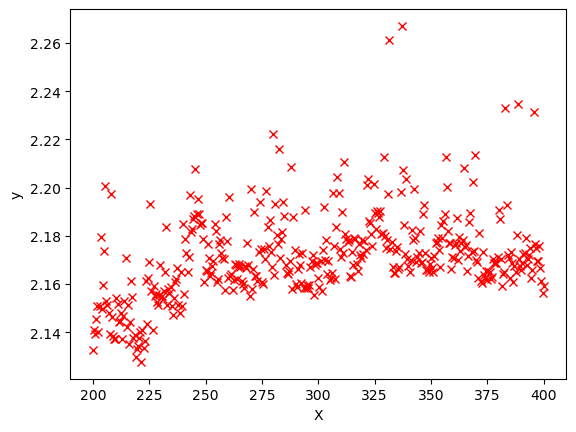

In [3]:
plt.plot(x, y, 'x', color='r')
plt.xlabel('X')
plt.ylabel('y')

#### <font color=red>EDIT</font>
### Minimize Residual Sum of Squares:     $ \min_{\theta} {|| X *\theta - y||_2} $ 

In [4]:
# Cost Function
def computeCost(X, y, theta):
    m = len(y)
    # np.dot -If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.
    dt = np.dot(X, theta) - y
    return np.dot(dt, dt) / 2 / m

In [5]:
# Gradient Descent Algorithm
def gradientDescent(X, y, theta, alpha, num_iters):
    # initialize some numbers #
    # number of training samples
    m = len(y)
    # cost function history
    J_history = np.zeros(num_iters)
    # start loop
    theta_new = theta.copy()
    for ii in range(num_iters): 
        # update theta
        theta_new -= alpha * np.dot(X.T, (np.dot(X,theta_new) - y)) / m
        # store cost function
        J_history[ii] = computeCost(X, y, theta_new)
    return theta_new, J_history

In [6]:
m = len(y)
# initialize data array
# X has two columns First Column of ones
X = np.ones((m, 2))
X[:,1] = x

# initalize model
# theta = np.zeros(2)
Th0 = min(y)
Th1 = ((max(y)-min(y)))/(max(x)-min(x))
theta = [Th0,Th1]
print(theta)

[2.1277, 0.000697000000000001]


In [7]:
# compute the cost function for theta = zeros
computeCost(X, y, theta)

0.014392650106296801

In [8]:
print("XShape", X.shape)
print("ThetaLen", len(theta)) # List Object
print("yShape", y.shape)

XShape (401, 2)
ThetaLen 2
yShape (401,)


### Gradient descent ###

In [9]:
# algorithm parameters
alpha = 1e-9
iterations = 100000

# run gradient descent
theta_new, J_history = gradientDescent(X, y, theta, alpha, iterations)

In [10]:
theta_new

array([2.12769825e+00, 1.44405649e-04])

In [11]:
J_history.shape

(100000,)

Text(0, 0.5, '$J(\\theta)$')

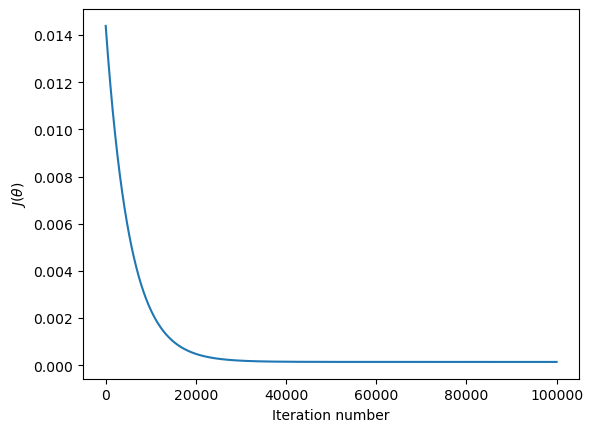

In [12]:
# Plot cost function vs. iteration
plt.plot(J_history)
plt.xlabel(r'Iteration number')
# The r preceding the title string is important -- it signifies that the string is a raw string
# and not to treat backslashes as python escapes.
plt.ylabel(r'$J(\theta)$')

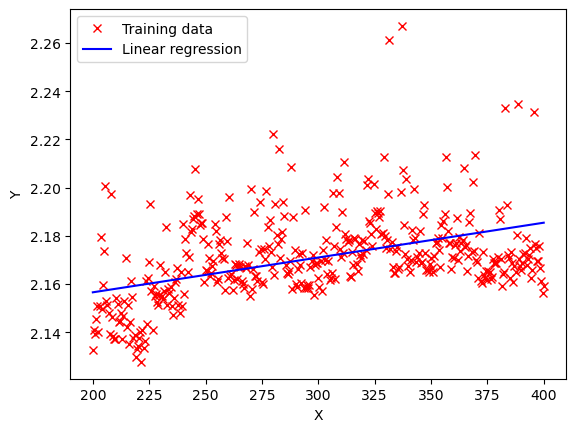

In [13]:
# plot data along with Linear regression
plt.plot(x, y, 'x', color='r', label='Training data')
plt.plot(x, np.dot(X, theta_new), label='Linear regression', color='b')
plt.xlabel(r'X')
plt.ylabel(r'Y')
plt.legend(loc='best')

## Visualizing $J(\theta)$ ##

In [14]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-theta_new[0]*5, theta_new[0]*5, 100)
theta1_vals = np.linspace(-theta_new[1]*5, theta_new[1]*5, 100)

# initialize J values
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# fill in J values
for ii, t0 in enumerate(theta0_vals):
    for jj, t1 in enumerate(theta1_vals):
        t = np.array([t0, t1])
        J_vals[ii,jj] = computeCost(X, y, t)       

In [15]:
print("J-vals_Shape",J_vals.shape) 

J-vals_Shape (100, 100)


In [16]:
[theta_new[0], theta_new[1],J_history[-1]]

[2.1276982483522953, 0.00014440564898162212, 0.00013714220925001693]

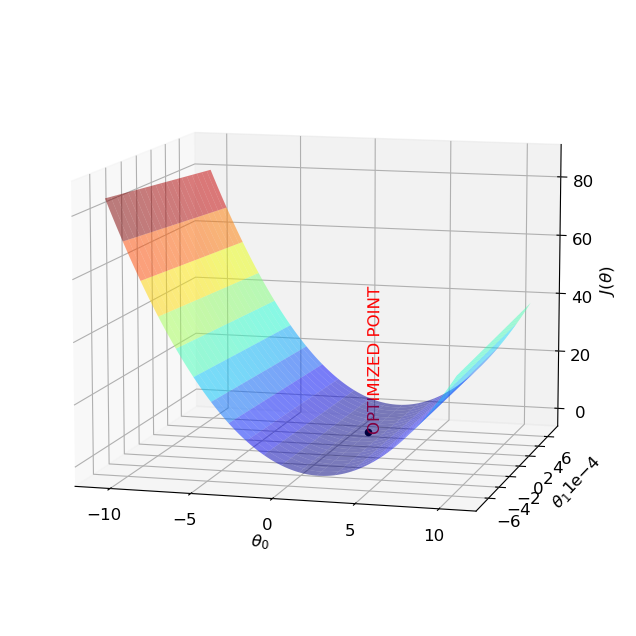

In [17]:
# Module containing Axes3D, an object which can plot 3D objects on a 2D matplotlib figure.
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.formatter.limits'] = [-3,3]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12

%matplotlib inline

# enable 2x images by just adding the line
#%config InlineBackend.figure_format = 'retina'

# make Surface plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

surf = ax.plot_surface(T0, T1, J_vals.T, cmap='jet', rstride=5, 
                       cstride=5, antialiased=True, alpha=0.5 )
# By using zdir='y', the y value of these points is fixed to the zs value 
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(theta_new[0], theta_new[1],zs=J_history[-1], zdir='y',s=20, c='k')

#ax.text(x, y, z, label, zdir,color='red')
ax.text(theta_new[0], theta_new[1],J_history[-1], 'OPTIMIZED POINT', (0,0,1),color='red')

ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')

ax.view_init(elev=10., azim=-75.)

Text(0, 0.5, '$\\theta_1$')

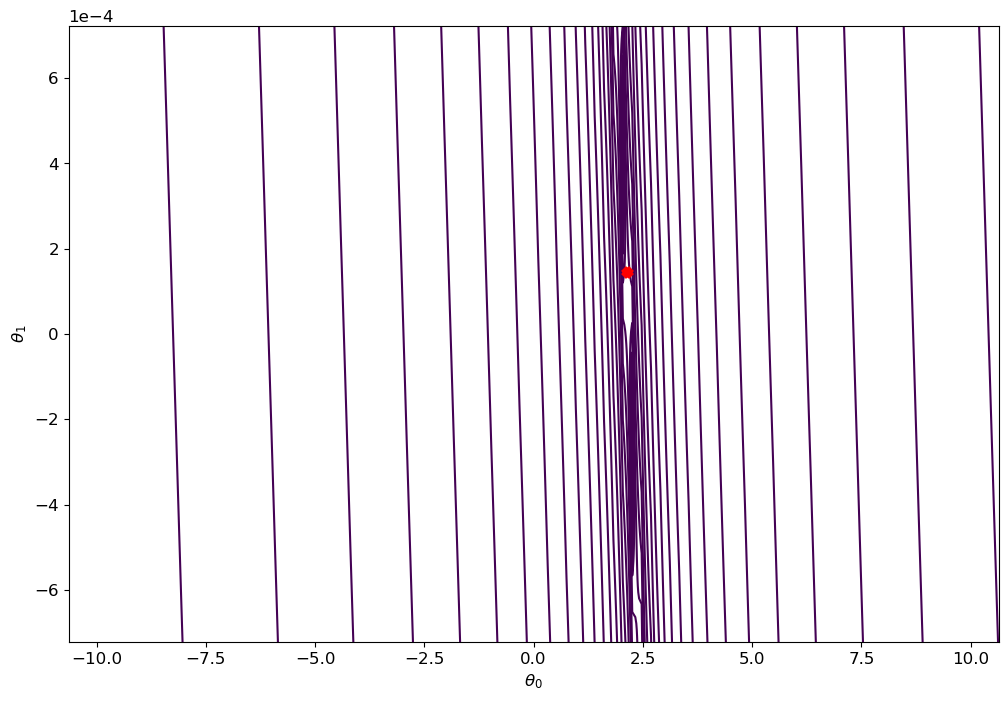

In [18]:
# make contour plot
fig = plt.figure(figsize=(12,8))
plt.contour(T0, T1, J_vals.T, np.logspace(-5, 5, 50))
# markeredgewidth or mew
plt.plot(theta_new[0], theta_new[1], 'x', color='r', mew=5)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')